<a href="https://colab.research.google.com/github/penkovgd/itmo-ml-course/blob/main/lab4_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Данная лабораторная посвящена работе с текстовыми данными.

Для общего развития (или если возникнут проблемы при выполнении заданий) рекомендуется ознакомиться с материалами курса по NLP, в частности с блокнотами 2 и 4:

1. [Вводная часть](https://colab.research.google.com/drive/1Fc9mAY-d-uA_x0naBQHYjbOSD7JyS0bf)

2. [Предобработка текста](https://colab.research.google.com/drive/1Lk4GcoS8KlXqjPXX6vK1teYbzaV5hNV8)

3. [Анализ и визуализация текстовых данных](https://colab.research.google.com/drive/1LoDu-ZvC4cKnfQTcgq_4Ya5gKmDyKg96)

4. [Векторизация](https://colab.research.google.com/drive/1n71YET2VbYIwyY0jYC5G1Zlkgl5ZInJ9)

5. [Другие задачи в области NLP](https://colab.research.google.com/drive/1u5IjpGisDXd_XH96lKTadJ8rKsg3VXD5)

Если вкратце, то компьютер умеет работать только с числами, а текст - это не числа, поэтому основная задача NLP - эффективно превратить текст в набор чисел (векторизовать). В идеале мы стремимся к тому, чтобы сохранить смысловую составляющую.

Важный факт, на который вы можете опираться при выполнении заданий:

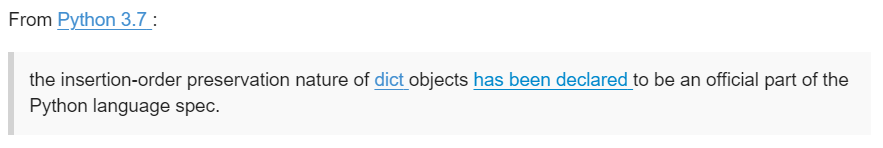

# Анализ текстовых данных

## Данные (3 балла)

Задача, которую мы будем пытаться решить, представляет собой классификацию коротких текстов по доменным областям знания, которым они принадлежат. Доменных областей (domain) будет 4. Данные возьмем с [OpenAlex](https://docs.openalex.org/).

Соберите не менее 10k англоязычных записей с OpenAlex. Для каждой записи сохраните поля `id`, `title`, `abstract`, `domain`. Сохраняйте только те записи, у которых присутствуют все необходимые поля. Вероятно, вам пригодится [эта страница](https://docs.openalex.org/how-to-use-the-api/get-lists-of-entities/paging) документации.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
def reconstruct_abstract(inv_idx: dict) -> str:
    pairs = []
    for word, positions in inv_idx.items():
        for pos in positions:
            pairs.append((pos, word))
    pairs.sort(key=lambda x: x[0])
    return " ".join(word for _, word in pairs)

In [ ]:
import requests

base_url = "https://api.openalex.org/works?filter=has_abstract:true&select=id,title,abstract_inverted_index,primary_topic&per_page=100&cursor={}"

works = []
cursor = "*"

while cursor and len(works) < 10_000:
    url = base_url.format(cursor)
    print("\n" + url)
    page_with_results = requests.get(url).json()

    results = page_with_results["results"]

    for work in results:
        abstract = reconstruct_abstract(work["abstract_inverted_index"])
        primary_topic = work.get("primary_topic") or {}
        domain = primary_topic.get("domain")
        if abstract and domain:
            works.append(
                {
                    "id": work["id"],
                    "title": work["title"],
                    "abstract": abstract,
                    "domain": domain.get("display_name"),
                }
            )
    cursor = page_with_results["meta"]["next_cursor"]

df = pd.DataFrame(works)


https://api.openalex.org/works?filter=has_abstract:true&select=id,title,abstract_inverted_index,primary_topic&per_page=100&cursor=*

https://api.openalex.org/works?filter=has_abstract:true&select=id,title,abstract_inverted_index,primary_topic&per_page=100&cursor=IlsxMDAuMCwgMzg1MjMsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMTk5MDUxMzc0MCddIg==

https://api.openalex.org/works?filter=has_abstract:true&select=id,title,abstract_inverted_index,primary_topic&per_page=100&cursor=IlsxMDAuMCwgMjczNTQsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjAwOTY3NDQxMCddIg==

https://api.openalex.org/works?filter=has_abstract:true&select=id,title,abstract_inverted_index,primary_topic&per_page=100&cursor=IlsxMDAuMCwgMjIyMzMsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjEyMjQxMDE4MiddIg==

https://api.openalex.org/works?filter=has_abstract:true&select=id,title,abstract_inverted_index,primary_topic&per_page=100&cursor=IlsxMDAuMCwgMTk0ODMsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjExMjc3NjQ4MyddIg==

https://api.openalex.org/works?filter=has_abstract

In [ ]:
df.head()

,id,title,abstract,domain
0,https://openalex.org/W1775749144,PROTEIN MEASUREMENT WITH THE FOLIN PHENOL REAGENT,Since 1922 when Wu proposed the use of the Fol...,Life Sciences
1,https://openalex.org/W2194775991,Deep Residual Learning for Image Recognition,Deeper neural networks are more difficult to t...,Physical Sciences
2,https://openalex.org/W1981368803,Generalized Gradient Approximation Made Simple,Generalized gradient approximations (GGA's) fo...,Physical Sciences
3,https://openalex.org/W1979290264,Using thematic analysis in psychology,Abstract Thematic analysis is a poorly demarca...,Health Sciences
4,https://openalex.org/W2144634347,Molecular Cloning: A Laboratory Manual,Molecular Cloning has served as the foundation...,Life Sciences


Изучите собранные данные. Минимально выведите следующую информацию:

* общее количество записей;

* количество уникальных значений (какие и сколько) для доменных областей;

* распределение количества символов и количества слов для `title` и `abstract`.

In [ ]:
print("Кол-во записей:", df.shape[0])

Кол-во записей: 10074


In [ ]:
print("Уникальные значения доменов с кол-вом:")
df.domain.value_counts()

Уникальные значения доменов с кол-вом:


domain
Physical Sciences    4253
Social Sciences      2762
Life Sciences        1536
Health Sciences      1523
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10074 entries, 0 to 10073
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        10074 non-null  object
 1   title     10072 non-null  object
 2   abstract  10074 non-null  object
 3   domain    10074 non-null  object
dtypes: object(4)
memory usage: 314.9+ KB


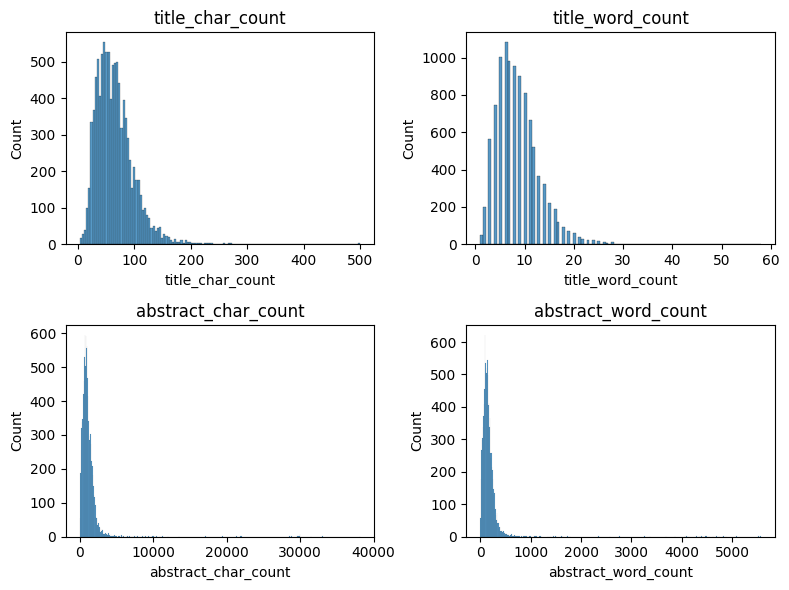

In [ ]:
df_copy = df.copy()

df_copy["title_char_count"] = df["title"].str.len()
df_copy["title_word_count"] = df["title"].str.split().str.len()
df_copy["abstract_char_count"] = df["abstract"].str.len()
df_copy["abstract_word_count"] = df["abstract"].str.split().str.len()

plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
sns.histplot(data=df_copy, x="title_char_count")
plt.title("title_char_count")

plt.subplot(2, 2, 2)
sns.histplot(data=df_copy, x="title_word_count")
plt.title("title_word_count")

plt.subplot(2, 2, 3)
sns.histplot(data=df_copy, x="abstract_char_count")
plt.title("abstract_char_count")

plt.subplot(2, 2, 4)
sns.histplot(data=df_copy, x="abstract_word_count")
plt.title("abstract_word_count")

plt.tight_layout()
plt.show()

Напишите функцию для предобработки текстовых данных. Она должна включать следующие шаги:

1. приведение текста к нижнему регистру;

2. удаление пунктуации и чисел;

3. лемматизация;

4. удаление стоп-слов;

5. удаление лишних пробельных символов.

Объедините `title` и `abstract` в один текст. Проведите его предобработку.

In [ ]:
%pip install neattext nltk -q

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import neattext.functions as nfx
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df["title_abstract"] = df["title"] + " " + df["abstract"]
df["title_abstract_preprocessed"] = (
    df["title_abstract"]
    .astype(str)
    .apply(
        lambda text: nfx.clean_text(
            text,
            # по условию:
            puncts=True,
            numbers=True,
            stopwords=True,
            multiple_whitespaces=True,
            # дополнительно:
            urls=True,
            emails=True,
            emojis=True,
            special_char=True,
            phone_num=True,
            non_ascii=False,
            currency_symbols=True,
        )
    )
)

lemmatizer = WordNetLemmatizer()


def lemmatize_text(text: str) -> str:
    tokens = nltk.word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmas)


df["title_abstract_preprocessed"] = df["title_abstract_preprocessed"].apply(
    lemmatize_text
)
df.head()

,id,title,abstract,domain,title_abstract,title_abstract_preprocessed
0,https://openalex.org/W1775749144,PROTEIN MEASUREMENT WITH THE FOLIN PHENOL REAGENT,Since 1922 when Wu proposed the use of the Fol...,Life Sciences,PROTEIN MEASUREMENT WITH THE FOLIN PHENOL REAG...,protein measurement folin phenol reagent wu pr...
1,https://openalex.org/W2194775991,Deep Residual Learning for Image Recognition,Deeper neural networks are more difficult to t...,Physical Sciences,Deep Residual Learning for Image Recognition D...,deep residual learning image recognition deepe...
2,https://openalex.org/W1981368803,Generalized Gradient Approximation Made Simple,Generalized gradient approximations (GGA's) fo...,Physical Sciences,Generalized Gradient Approximation Made Simple...,generalized gradient approximation simple gene...
3,https://openalex.org/W1979290264,Using thematic analysis in psychology,Abstract Thematic analysis is a poorly demarca...,Health Sciences,Using thematic analysis in psychology Abstract...,thematic analysis psychology abstract thematic...
4,https://openalex.org/W2144634347,Molecular Cloning: A Laboratory Manual,Molecular Cloning has served as the foundation...,Life Sciences,Molecular Cloning: A Laboratory Manual Molecul...,molecular cloning laboratory manual molecular ...


В качестве алгоритма классификации будем использовать Наивный Байес (`MultinomialNB`) и `LinearSVC` с фиксированным `random_state`=42.

Для оценки разделите ваши данные в соотношении 80:20. Сделайте это ДО проведения любой векторизации. Общее правило, чтобы понять, можно применять обработку до разделения или только после - если ваша предобработка работает с каждой записью независимо, то можно пременить её до разделения. Иначе, если при обработке одной записи используется какая-либо информация из других записей (среднее, уникальные значения, общее кол-во и так далее), применять её рекомендуется только после разделения.

При оценке используйте `classification_report` и `confusion_matrix` (для визуализации пригодится `seaborn.heatmap`).

In [ ]:
from sklearn.model_selection import train_test_split


texts = df["title_abstract_preprocessed"]
# labels, labels_names = pd.factorize(df['domain'])

X_train, X_test, y_train, y_test = train_test_split(
    texts, df["domain"], test_size=0.2, random_state=42
)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix


clf1 = MultinomialNB()
clf1.fit(X_train_vectors, y_train)
y_pred_clf1 = clf1.predict(X_test_vectors)

print(classification_report(y_test, y_pred_clf1))


                   precision    recall  f1-score   support

  Health Sciences       0.86      0.78      0.82       316
    Life Sciences       0.78      0.71      0.74       308
Physical Sciences       0.88      0.90      0.89       861
  Social Sciences       0.83      0.88      0.86       530

         accuracy                           0.85      2015
        macro avg       0.84      0.82      0.83      2015
     weighted avg       0.85      0.85      0.85      2015



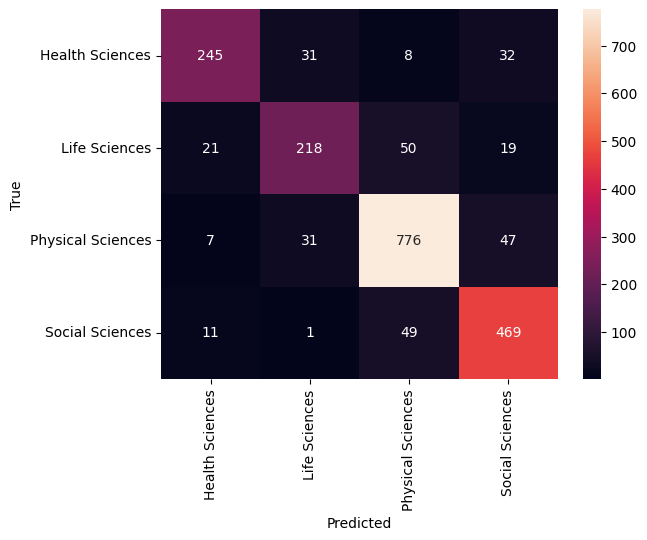

In [ ]:
cm_clf1 = confusion_matrix(y_test, y_pred_clf1, labels=clf1.classes_)
sns.heatmap(
    cm_clf1, annot=True, fmt="d", xticklabels=clf1.classes_, yticklabels=clf1.classes_
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

                   precision    recall  f1-score   support

  Health Sciences       0.82      0.77      0.79       316
    Life Sciences       0.78      0.72      0.75       308
Physical Sciences       0.86      0.88      0.87       861
  Social Sciences       0.81      0.84      0.82       530

         accuracy                           0.83      2015
        macro avg       0.82      0.80      0.81      2015
     weighted avg       0.83      0.83      0.83      2015



c:\Users\George\Documents\itmo-ml\.venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


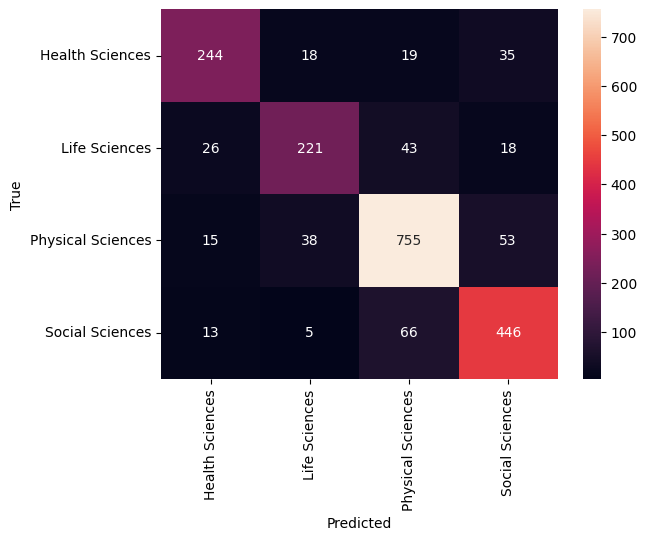

In [ ]:
clf2 = LinearSVC(random_state=42)

clf2.fit(X_train_vectors, y_train)
y_pred_clf2 = clf2.predict(X_test_vectors)
print(classification_report(y_test, y_pred_clf2))

cm_clf2 = confusion_matrix(y_test, y_pred_clf2, labels=clf2.classes_)
sns.heatmap(
    cm_clf2, annot=True, fmt="d", xticklabels=clf2.classes_, yticklabels=clf2.classes_
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Bag of Words (3 балла)

"Мешок слов" (Bag of Words, BoW) — это самый простой подход к векторизации текста.

Порядок слов не учитывается, а вся информация об анализируемом тексте сосредоточена в частоте встречаемости слов.
```
docs = [
  {'word1': 2, 'word2': 0, 'word3': 8, ...},
  {'word1': 1, 'word2': 0, 'word3': 2, ...},
  ...
  ]

len(docs[i].keys()) = общее кол-во слов ('word1', 'word2', 'word3', ...) в корпусе
docs[i] - представление i-того документа
```

Основные шаги алгоритма:

1. токенизация;

2. fit: построение словаря: создание словаря из всех уникальных слов, встречающихся в корпусе;

3. transform: подсчет частоты: для каждого слова из словаря подсчитывается, сколько раз оно встречается в тексте.

Допишите класс со следующей сигнатурой (можно добавить ещё методы). Работать будем только со словами. Параметр max_features отвечает за фиксированную длину вектора (подумайте, как длина вектора связана с объемом словаря).

In [ ]:
from collections import Counter


class BagOfWords:
    """
    Bag of Words модель для векторизации текстовых данных.

    Параметры:
        ngram_range (tuple): Диапазон n-грамм для создания признаков.
        max_features (int): Максимальное количество признаков для использования.

    Атрибуты:
        ngram_range (tuple): Диапазон n-грамм для создания признаков.
        max_features (int): Максимальное количество признаков для использования.
        vocabulary (dict): Словарь, сопоставляющий токены частоте их встречаемости.
    """

    def __init__(self, ngram_range=(1, 1), max_features=None):
        self.ngram_range = ngram_range
        self.max_features = max_features
        self.vocabulary = {}

    def get_ngrams(self, tokens):
        ngrams = []
        for n in range(self.ngram_range[0], self.ngram_range[1] + 1):
            for i in range(len(tokens) - n + 1):
                ngrams.append(" ".join(tokens[i : i + n]))
        return ngrams

    def fit(self, documents):
        """
        Создает словарь на основе предоставленных документов.

        Параметры:
            documents (list): Список текстовых документов.
        """
        ngram_counter = Counter()
        for doc in documents:
            tokens = self.tokenize(doc)
            ngram_counter.update(self.get_ngrams(tokens))
        most_common = ngram_counter.most_common(self.max_features)
        self.vocabulary = {ngram: count for ngram, count in most_common}

    def transform(self, documents: list[str]):
        """
        Преобразует текстовые документы в векторное представление с использованием созданного словаря.

        Параметры:
            documents (list): Список текстовых документов.

        Возвращает:
            list: Векторное представление документов.
        """
        if not len(self.vocabulary):
            raise ValueError(
                "The vocabulary has not been created. Call fit method first."
            )
        vectors = []
        for doc in documents:
            tokens = self.tokenize(doc)
            ngrams = self.get_ngrams(tokens)
            ngram_counter = Counter(ngrams)
            vector = [
                ngram_counter.get(ngram, 0) for ngram, _ in self.vocabulary.items()
            ]

            vectors.append(vector)
        return vectors

    def fit_transform(self, documents):
        """
        Обучает модель на предоставленных документах и возвращает их векторное представление.

        Параметры:
            documents (list): Список текстовых документов.

        Возвращает:
            list: Векторное представление документов.
        """
        self.fit(documents)
        return self.transform(documents)

    def tokenize(self, text):
        """
        Разбивает текст на токены.

        Параметры:
            text (str): Текст для токенизации.

        Возвращает:
            list: Список токенов.
        """
        return nltk.word_tokenize(text)

In [ ]:
bow = BagOfWords(ngram_range=(1, 2), max_features=100)

test_sentences = [
    "BoW transforms text into a frequency vector based on words occurrence",
    "in BoW each word's count creates a unique feature",
    "BoW ignores word order focusing on word occurrence frequency",
]
vectors = bow.fit_transform(test_sentences)
pd.DataFrame(vectors, columns=list(bow.vocabulary.keys()))

,BoW,word,a,frequency,on,occurrence,transforms,text,into,vector,...,order,focusing,BoW ignores,ignores word,word order,order focusing,focusing on,on word,word occurrence,occurrence frequency
0,1,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,0,1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


Векторизуйте тексты с помощью вашего алгоритма. Обучите классификатор и оцените скорость работы и качество классификации по доменным областям (domain). Поэкспериментируйте с гиперпараметрами вашего векторайзера.

In [ ]:
import itertools
from sklearn.metrics import accuracy_score

In [ ]:
%%time

my_bow = BagOfWords((1, 2), max_features=1000)
X_train_vectors = my_bow.fit_transform(X_train)
X_test_vectors = my_bow.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_vectors, y_train)
y_pred = clf.predict(X_test_vectors)

print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

  Health Sciences       0.83      0.69      0.75       316
    Life Sciences       0.67      0.73      0.70       308
Physical Sciences       0.88      0.84      0.86       861
  Social Sciences       0.78      0.86      0.82       530

         accuracy                           0.81      2015
        macro avg       0.79      0.78      0.78      2015
     weighted avg       0.81      0.81      0.81      2015

CPU times: total: 8.62 s
Wall time: 8.79 s


In [ ]:
%%time

param_grid = {"ngram_range_max": [1, 2], "max_features": [1000, 5000]}

for combo in itertools.product(*param_grid.values()):
    params = dict(zip(param_grid.keys(), combo))
    print(
        f"Params: ngram_range_max={params['ngram_range_max']}, max_features={params['max_features']}"
    )

    my_bow = BagOfWords(
        (1, params["ngram_range_max"]), max_features=params["max_features"]
    )
    X_train_vectors = my_bow.fit_transform(X_train)
    X_test_vectors = my_bow.transform(X_test)

    clf = MultinomialNB()
    clf.fit(X_train_vectors, y_train)
    y_pred = clf.predict(X_test_vectors)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}\n")

Params: ngram_range_max=1, max_features=1000
Accuracy: 0.8050

Params: ngram_range_max=1, max_features=5000
Accuracy: 0.8347

Params: ngram_range_max=2, max_features=1000
Accuracy: 0.8065

Params: ngram_range_max=2, max_features=5000
Accuracy: 0.8298

CPU times: total: 45.3 s
Wall time: 46.7 s


Воспользуйтесь готовой реализацией CountVectorizer из sklearn. Сопоставимые ли результаты получаются? Подберите гиперпараметры с помощью GridSearch.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
%%time

pipeline = Pipeline(
    [("vectorizer", CountVectorizer()), ("classifier", MultinomialNB())]
)

param_grid = {
    "vectorizer__ngram_range": [(1, 1), (1, 2)],
    "vectorizer__max_features": [1000, 5000, None],
}

grid_search = GridSearchCV(
    pipeline, param_grid, scoring="accuracy", verbose=2, n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'vectorizer__max_features': None, 'vectorizer__ngram_range': (1, 1)}
Best Score: 0.8424102748936052
CPU times: total: 1.44 s
Wall time: 13.4 s


### Keywords (0.5 балла)

Выведите топ-20 ключевых слов для каждого домена (то есть таких, которые превалируют именно в конкретном домене) и общие топ-20 слов по всем доменам. Используйте `CountVectorizer`.

In [ ]:
def get_top_frequent_terms(texts, top=20):
    vectorizer = CountVectorizer()
    X_vec = vectorizer.fit_transform(texts)
    terms_freq = np.ravel(X_vec.sum(axis=0)).tolist()

    vocab = vectorizer.get_feature_names_out()
    freqs = list(zip(vocab, terms_freq))
    sorted_freqs = sorted(freqs, key=lambda x: x[1], reverse=True)
    return pd.DataFrame(sorted_freqs, columns=["term", "freq"]).head(top)


tops = []
for domain in df["domain"].unique():
    texts = df[df["domain"] == domain]["title_abstract_preprocessed"]

    print(f"\nTop 20 terms for domain '{domain}':")
    top = get_top_frequent_terms(texts)
    tops.append(top)
    print(top)

print("\nTop 20 overall frequent terms:")
total_freq = get_top_frequent_terms(df["title_abstract_preprocessed"])
tops.append(total_freq)
print(total_freq)


Top 20 terms for domain 'Life Sciences':
          term  freq
0         cell  1235
1         gene  1224
2         data  1065
3     analysis   956
4      protein   911
5     sequence   907
6       method   835
7          new   641
8       genome   592
9        human   592
10         dna   541
11       study   538
12      system   528
13       model   509
14  expression   469
15    function   429
16   structure   415
17   available   411
18      result   395
19      cancer   393

Top 20 terms for domain 'Physical Sciences':
           term  freq
0         model  3020
1        method  2708
2          data  2577
3        system  2093
4      analysis  1831
5           new  1565
6       problem  1547
7       network  1501
8   application  1497
9        theory  1442
10    algorithm  1345
11      article  1301
12       result  1279
13  information  1202
14     function  1099
15       number  1069
16    structure  1060
17     property  1006
18        field   969
19        image   960

Top 20 t

## TF-IDF (3 балла)

TF-IDF представляет собой числовую статистику, отражающую важность слова в документе относительно коллекции документов (корпуса). Мы всё еще считаем частоту слов, но теперь делаем это более по-умному.

Оценка TF-IDF вычисляется с использованием двух основных компонент: частоты термина (TF) и обратной частоты документа (IDF).

1. **TF**
   
   Измеряет, насколько часто термин (слово) встречается в документе. Рассчитывается как отношение числа раз, когда термин появляется в документе, к общему числу терминов в этом документе.
   
   $$ \text{TF}(t, d) = \frac{\text{Количество раз, когда термин } t \text{ появляется в документе } d}{\text{Общее количество терминов в документе } d} $$

2. **IDF**
   
   Измеряет важность термина по всему корпусу. Она рассчитывается как логарифм отношения общего числа документов к числу документов, содержащих термин, плюс единица для избежания деления на ноль.

   $$ \text{IDF}(t, D) = \log\left(\frac{\text{Общее количество документов в корпусе } N}{\text{Количество документов, содержащих термин } t + 1} \right) $$

   Здесь \(N\) - общее количество документов в корпусе.
   Логарифм нужен для сглаживания.

   **P.S.** В sklearn используется формула $$ \text{IDF}(t, D) = \log\left(\frac{\text{Общее количество документов в корпусе } N + 1}{\text{Количество документов, содержащих термин } t + 1} \right) + 1 $$

   В вашей реализации нужно будет использовать именно её.

3. **Оценка TF-IDF:**
   
   $$ \text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D) $$

   Эта оценка присваивает более высокий вес терминам, часто встречающимся в конкретном документе, но относительно редким в общей коллекции документов.

Ваша задача - реализовать класс со следующей сигнатурой (можно менять или добавлять методы при необходимости) для векторизации с помощью TF-IDF подхода. Используйте разбиение только по словам. При отборе `max_features` ориентируйтесь на term frequency.

In [ ]:
from math import log


class TFIDF:
    """
    TF-IDF модель для векторизации текстовых данных.

    Параметры:
        ngram_range (tuple): Диапазон n-грамм для создания признаков.
        max_features (int): Максимальное количество признаков для использования.

    Атрибуты:
        ngram_range (tuple): Диапазон n-грамм для создания признаков.
        max_features (int): Максимальное количество признаков для использования.
        vocabulary (dict): Словарь, сопоставляющий токены их tf-idf значениям.
    """

    def __init__(self, ngram_range=(1, 1), max_features=None):
        self.ngram_range = ngram_range
        self.max_features = max_features
        self.vocabulary = {}
        self.idf = {}

    def get_ngrams(self, tokens):
        ngrams = []
        for n in range(self.ngram_range[0], self.ngram_range[1] + 1):
            for i in range(len(tokens) - n + 1):
                ngrams.append(" ".join(tokens[i : i + n]))
        return ngrams

    def fit(self, documents):
        """
        Создает словарь на основе предоставленных документов.

        Параметры:
            documents (list): Список текстовых документов.
        """
        df_counter = Counter()  # для каждого термина будет считаться кол-во документов, в котором этот термин есть
        term_counter = Counter()  # считает TF среди всего корпуса (для max_features)
        total_docs = len(documents)
        for doc in documents:
            tokens = self.tokenize(doc)
            terms = self.get_ngrams(tokens)
            term_counter.update(terms)
            df_counter.update(set(terms))

        most_common = term_counter.most_common(self.max_features)
        self.vocabulary = {term: idx for idx, (term, _) in enumerate(most_common)}
        self.idf = {
            term: log((total_docs + 1) / (df_counter[term] + 1)) + 1
            for term in self.vocabulary.keys()
        }

    def transform(self, documents):
        """
        Преобразует текстовые документы в векторное представление с использованием созданного словаря.

        Параметры:
            documents (list): Список текстовых документов.

        Возвращает:
            list: Векторное представление документов.
        """
        if not len(self.vocabulary):
            raise ValueError(
                "The vocabulary has not been created. Call fit method first."
            )
        vectors = []
        for doc in documents:
            tokens = self.tokenize(doc)
            terms = self.get_ngrams(tokens)
            tf_counter = Counter(terms)
            vec = [0.0] * len(self.vocabulary)
            for term, idx in self.vocabulary.items():
                tf = tf_counter.get(term, 0)
                vec[idx] = tf * self.idf.get(term, 0.0)
            vectors.append(vec)
        return vectors

    def fit_transform(self, documents):
        """
        Обучает модель на предоставленных документах и возвращает их векторное представление.

        Параметры:
            documents (list): Список текстовых документов.

        Возвращает:
            list: Векторное представление документов.
        """
        self.fit(documents)
        return self.transform(documents)

    def tokenize(self, text):
        """
        Разбивает текст на токены.

        Параметры:
            text (str): Текст для токенизации.

        Возвращает:
            list: Список токенов.
        """
        return nltk.word_tokenize(text)

In [ ]:
tfidf = TFIDF(ngram_range=(1, 2), max_features=15)

test_sentences = [
    "tf-idf measures word importance relative to its frequency in a document",
    "tf-idf considers word uniqueness across all documents in the corpus",
    "it identifies significant words common in a document yet rare across all documents",
]

vectors = tfidf.fit_transform(test_sentences)
pd.DataFrame(vectors, columns=list(tfidf.vocabulary.keys()))

,in,tf-idf,word,a,document,in a,a document,across,all,documents,across all,all documents,measures,importance,relative
0,1.0,1.287682,1.287682,1.287682,1.287682,1.287682,1.287682,0.000000,0.000000,0.000000,0.000000,0.000000,1.693147,1.693147,1.693147
1,1.0,1.287682,1.287682,0.000000,0.000000,0.000000,0.000000,1.287682,1.287682,1.287682,1.287682,1.287682,0.000000,0.000000,0.000000
2,1.0,0.000000,0.000000,1.287682,1.287682,1.287682,1.287682,1.287682,1.287682,1.287682,1.287682,1.287682,0.000000,0.000000,0.000000


Векторизуйте тексты с помощью вашего алгоритма. Обучите классификатор и оцените скорость работы и качество классификации по доменным областям (domain). Поэкспериментируйте с гиперпараметрами вашего векторайзера.

In [ ]:
%%time

my_tfidf = TFIDF((1, 2), max_features=5000)
X_train_vectors = my_tfidf.fit_transform(X_train)
X_test_vectors = my_tfidf.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_vectors, y_train)
y_pred = clf.predict(X_test_vectors)

print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

  Health Sciences       0.86      0.74      0.79       316
    Life Sciences       0.71      0.77      0.74       308
Physical Sciences       0.91      0.85      0.88       861
  Social Sciences       0.80      0.91      0.85       530

         accuracy                           0.84      2015
        macro avg       0.82      0.82      0.82      2015
     weighted avg       0.84      0.84      0.84      2015

CPU times: total: 22.2 s
Wall time: 22.4 s


In [ ]:
%%time

param_grid = {"ngram_range_max": [1, 2], "max_features": [1000, 5000]}

for combo in itertools.product(*param_grid.values()):
    params = dict(zip(param_grid.keys(), combo))
    print(
        f"Params: ngram_range_max={params['ngram_range_max']}, max_features={params['max_features']}"
    )

    my_tfidf = TFIDF(
        (1, params["ngram_range_max"]), max_features=params["max_features"]
    )
    X_train_vectors = my_tfidf.fit_transform(X_train)
    X_test_vectors = my_tfidf.transform(X_test)

    clf = MultinomialNB()
    clf.fit(X_train_vectors, y_train)
    y_pred = clf.predict(X_test_vectors)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}\n")

Params: ngram_range_max=1, max_features=1000
Accuracy: 0.8055

Params: ngram_range_max=1, max_features=5000
Accuracy: 0.8392

Params: ngram_range_max=2, max_features=1000
Accuracy: 0.8050

Params: ngram_range_max=2, max_features=5000
Accuracy: 0.8362

CPU times: total: 58.6 s
Wall time: 59.6 s


Воспользуйтесь готовой реализацией TfIdfVectorizer из sklearn. Сопоставимые ли результаты получаются? Подберите гиперпараметры с помощью GridSearch.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
%%time

pipeline = Pipeline(
    [("vectorizer", TfidfVectorizer()), ("classifier", MultinomialNB())]
)

param_grid = {
    "vectorizer__ngram_range": [(1, 1), (1, 2)],
    "vectorizer__max_features": [1000, 5000, None],
}

grid_search = GridSearchCV(
    pipeline, param_grid, scoring="accuracy", verbose=2, n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 1)}
Best Score: 0.8290093849203599
CPU times: total: 1.75 s
Wall time: 10.7 s


С каким векторайзером лучше работает Наивный Байес? Предположите, чем обусловлена разница в качестве. Ответьте письменно.

**Ответ:**
Наивный Байес слегка лучше работает с CountVectorizer/BagofWords. Хоть и в документации по MultinomialNB говорится, что НБ тоже работает с TFIDF (в чем мы убедились), все-таки эта модель предназначена для работы с дискретными признками, т.е. с BoW, а не TFIDF

### Keywords (0.5 балла)

Выведите топ-20 ключевых слов для каждого домена (то есть таких, которые превалируют именно в конкретном домене) и общие топ-20 слов по всем доменам. Используйте TF-IDF. Есть ли отличия по сравнению с тем, что получалось при использовании мешка слов?

In [ ]:
def get_top_frequent_terms(texts, top=20):
    vectorizer = TfidfVectorizer()
    X_vec = vectorizer.fit_transform(texts)
    terms_freq = np.ravel(X_vec.sum(axis=0)).tolist()

    vocab = vectorizer.get_feature_names_out()
    freqs = list(zip(vocab, terms_freq))
    sorted_freqs = sorted(freqs, key=lambda x: x[1], reverse=True)
    return pd.DataFrame(sorted_freqs, columns=["term", "freq"]).head(top)


for i, domain in enumerate(df["domain"].unique()):
    texts = df[df["domain"] == domain]["title_abstract_preprocessed"]
    top = get_top_frequent_terms(texts)
    tops[i]["tfidf_term"] = top["term"]
    tops[i]["tfidf_score"] = top["freq"]

total_freq = get_top_frequent_terms(df["title_abstract_preprocessed"])
tops[-1]["tfidf_term"] = total_freq["term"]
tops[-1]["tfidf_score"] = total_freq["freq"]


In [ ]:
print(df["domain"].unique()[0])
tops[0]

Life Sciences


,term,freq,tfidf_term,tfidf_score
0,cell,1235,cell,39.444638
1,gene,1224,gene,38.860333
2,data,1065,data,33.046302
3,analysis,956,sequence,31.099821
4,protein,911,analysis,30.726660
5,sequence,907,protein,30.686086
6,method,835,method,28.890526
7,new,641,genome,24.937438
8,genome,592,human,22.111531
9,human,592,dna,21.152714


In [ ]:
print(df["domain"].unique()[1])
tops[1]

Physical Sciences


,term,freq,tfidf_term,tfidf_score
0,model,3020,model,94.955825
1,method,2708,method,88.005684
2,data,2577,data,80.182756
3,system,2093,system,72.705747
4,analysis,1831,network,67.770655
5,new,1565,article,65.590732
6,problem,1547,analysis,61.336176
7,network,1501,theory,60.734950
8,application,1497,algorithm,59.320278
9,theory,1442,problem,57.682915


In [ ]:
print(df["domain"].unique()[2])
tops[2]

Health Sciences


,term,freq,tfidf_term,tfidf_score
0,patient,2676,patient,51.037513
1,cancer,1590,cancer,49.406377
2,disease,1578,disease,36.405277
3,study,1302,health,25.820123
4,clinical,1018,study,24.816981
5,risk,1005,cell,24.360477
6,health,994,clinical,23.983779
7,group,945,risk,23.297326
8,year,940,death,23.179240
9,rate,871,group,22.058843


In [ ]:
print(df["domain"].unique()[3])
tops[3]

Social Sciences


,term,freq,tfidf_term,tfidf_score
0,research,2100,research,64.904382
1,theory,1841,theory,63.783522
2,study,1694,social,59.976320
3,social,1633,model,55.614136
4,model,1627,study,49.507250
5,analysis,1258,analysis,42.453115
6,data,1069,data,37.942783
7,method,959,method,37.136779
8,new,946,new,35.559987
9,firm,866,process,33.692336


In [ ]:
print("All corpus")
tops[4]

All corpus


,term,freq,tfidf_term,tfidf_score
0,data,5543,model,176.919048
1,model,5487,method,161.625790
2,method,4954,data,159.447869
3,analysis,4466,theory,140.070034
4,study,4294,analysis,138.499796
5,research,3883,research,127.703539
6,new,3736,system,126.470384
7,system,3602,study,117.635126
8,theory,3510,new,116.047891
9,patient,3003,article,103.253914


## [GloVe](https://nlp.stanford.edu/projects/glove/) (3 балла)

GloVe (Global Vectors) — это метод векторного представления слов, предназначенный для извлечения семантической информации из текста. Он позволяет представлять слова в виде векторов в многомерном пространстве, где схожие слова расположены близко друг к другу.

GloVe стремится захватить семантические отношения между словами на основе их частоты встречаемости в корпусе текста. Основная идея заключается в том, чтобы определить, насколько часто два слова встречаются вместе.

Сначала строится матрица совстречаемости, в которой каждый элемент отражает, насколько часто слово $i$ встречается в контексте слова $j$. Затем делается матричное разложение, чтобы получить более компактные эмбеддинги.

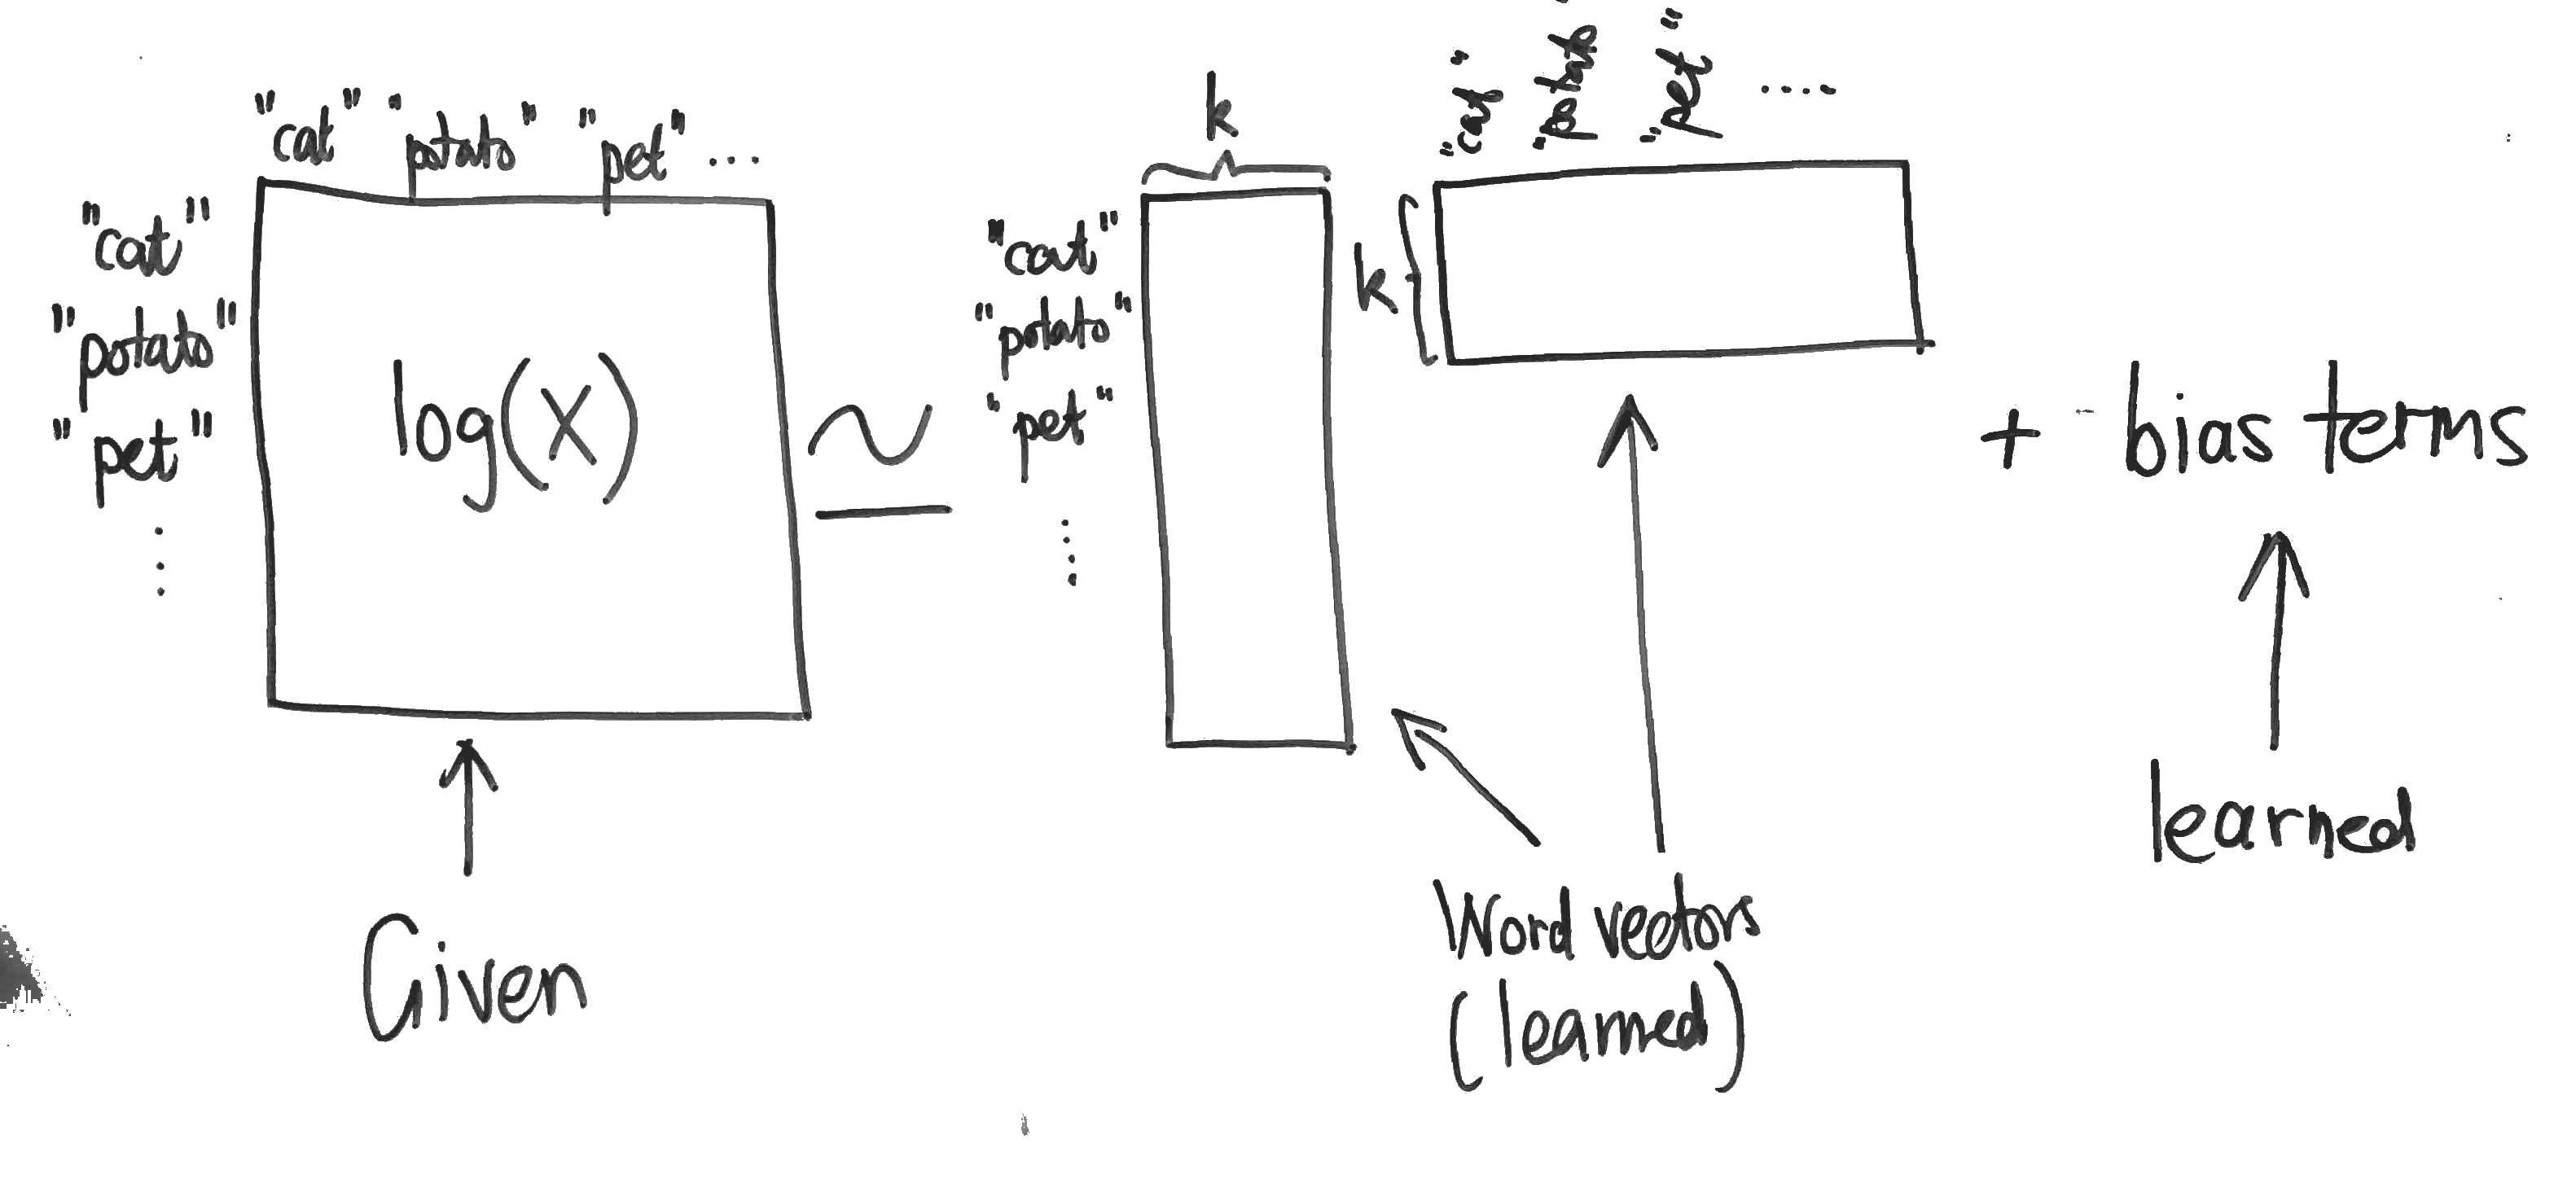

Чтобы реализовать всю эту красоту, потребуется алгоритм для матричной факторизации, а именно сингулярное разложение. Очень хорошиее объяснение можно найти [по ссылке](https://davetang.org/file/Singular_Value_Decomposition_Tutorial.pdf).

При работе с большими матрицами будет проблематично высчитать все собственные значения, поэтому как всегда в подобных случаях воспользуемся градиентным спуском. Функция потерь MSE.

Допишите реализацию.

In [ ]:
import numpy as np


def svd_gradient_descent(A, k, learning_rate=0.001, epochs=100):
    """
    Параметры:
    A (numpy.ndarray): Входная матрица (m, n).
    k (int): Количество сингулярных значений для вычисления.
    learning_rate (float): Скорость обучения для градиентного спуска.
    epochs (int): Количество итераций для градиентного спуска.

    Возвращает:
    U (numpy.ndarray): Левые сингулярные векторы (m, k).
    V_T (numpy.ndarray): Правые сингулярные векторы (k, n).
    """

    m, n = A.shape
    np.random.seed(42)
    U = np.random.randn(m, k)
    V_T = np.random.randn(k, n)

    for i in range(epochs):
        grad_L_U = (U @ V_T - A) @ V_T.T
        grad_L_V = U.T @ (U @ V_T - A)

        U -= learning_rate * grad_L_U
        V_T -= learning_rate * grad_L_V

    return U, V_T

In [ ]:
# Примеры - значения матрицы Result должны приближаться к значениям исходной матрицам

print("-" * 50)

A = np.array([[3, 1, 1], [-1, 3, 1]])

U, V_T = svd_gradient_descent(A, k=2, learning_rate=0.1)
print("U:\n", U)
print("V_T:\n", V_T)
print("Result:\n", U @ V_T)

print("-" * 50)

A2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

U2, V_T2 = svd_gradient_descent(A2, k=2, learning_rate=0.02, epochs=1000)
print("U2:\n", U2)
print("V_T2:\n", V_T2)
print("Result2:\n", U2 @ V_T2)

print("-" * 50)

--------------------------------------------------
U:
 [[ 1.53805671 -0.0920823 ]
 [ 0.13866564  1.91027916]]
V_T:
 [[ 1.91086831  0.74097264  0.67856272]
 [-0.66219211  1.51666449  0.47422737]]
Result:
 [[ 3.  1.  1.]
 [-1.  3.  1.]]
--------------------------------------------------
U2:
 [[0.65090812 1.40427696]
 [1.97364485 0.73170393]
 [3.29645905 0.05860432]]
V_T2:
 [[ 2.12838454  2.42148212  2.71457971]
 [-0.27439828  0.30182252  0.87804332]]
Result2:
 [[1.00005159 2.00000478 2.99995798]
 [3.99989688 4.99999044 6.00008401]
 [7.00005155 8.00000478 8.999958  ]]
--------------------------------------------------


Теперь реализуем сам алгоритм GloVe. Будем хранить матрицу со-встречаемости слов как разреженную матрицу (иначе не хватит оперативной памяти), а в качестве алгоритма для матричного разложения воспользуемся более оптимизированной, чем наша, версией "из коробки".

Сам код оформим в виде набора функций. Допишите реализацию.

In [ ]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix


def get_distinct_words(corpus):
    """
    Извлекает уникальные слова из текстов корпуса.

    Параметры:
        corpus (list): Список списков, где каждый внутренний список - токенизированный текст документа.

    Возвращает:
        tuple: Кортеж, содержащий:
            - list: Отсортированный список уникальных слов в корпусе.
            - int: Общее количество уникальных слов в корпусе.
    """
    unique_words = set()
    for document in corpus:
        unique_words.update(document)

    sorted_words = sorted(unique_words)
    return sorted_words, len(sorted_words)


def compute_cooccurrence_matrix(corpus, window_size=1):
    """
    Вычисляет матрицу со-встречаемости для корпуса.

    Параметры:
        corpus (list): Список списков, где каждый внутренний список - токенизированный текст документа.
        window_size (int): Размер окна контекста для вычисления со-встречаемости (окно = центральное слово +- window_size).

    Возвращает:
        tuple: Кортеж, содержащий:
            - csr_matrix: Матрица cо-встречаемости, представленная как разреженная матрица.
            - dict: Словарь, сопоставляющий каждое слово его индексу в матрице.
    """
    words, n_words = get_distinct_words(corpus)
    word_to_index = {word: i for i, word in enumerate(words)}

    row, col, data = [], [], []
    # cooccurrence_counter = defaultdict(int)

    for document in corpus:
        for i, center_word in enumerate(document):
            center_word_idx = word_to_index[center_word]
            left = max(i - window_size, 0)
            right = min(i + window_size + 1, len(document))

            for j in range(left, right):
                if i != j:
                    word_j = document[j]
                    word_j_idx = word_to_index[word_j]
                    row.append(center_word_idx)
                    col.append(word_j_idx)
                    data.append(1)
                    # cooccurrence_counter[(center_word_idx, word_j_idx)] += 1
    # for (i , j), count in cooccurrence_counter.items():
    #     row.append(i)
    #     col.append(j)
    #     data.append(count)

    cooccurrence_matrix = csr_matrix((data, (row, col)), shape=(n_words, n_words))
    return cooccurrence_matrix, word_to_index


def normalize(M):
    """
    Нормализует строки матрицы.

    Параметры:
        M (numpy.ndarray): Матрица, которую нужно нормализовать.

    Возвращает:
        numpy.ndarray: Нормализованная матрица.
    """
    M_lengths = np.linalg.norm(M, axis=1)
    M_normalized = M / (M_lengths[:, np.newaxis] + 0.000001)  # сглаживание
    return M_normalized

In [ ]:
# Тесты

corpus = [["apple", "banana", "apple"], ["orange", "banana", "grape"]]
distinct_words, num_words = get_distinct_words(corpus)
assert distinct_words == ["apple", "banana", "grape", "orange"]
assert num_words == 4
print("get_distinct_words() works correctly!")

corpus = [["apple", "banana", "apple"], ["orange", "banana", "grape"]]
window_size = 1
M, word2ind = compute_cooccurrence_matrix(corpus, window_size)
expected_indices = {"apple": 0, "banana": 1, "grape": 2, "orange": 3}
expected_matrix = [
    [0.0, 2.0, 0.0, 0.0],
    [2.0, 0.0, 1.0, 1.0],
    [0.0, 1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0, 0.0],
]
assert word2ind == expected_indices
assert (M.toarray() == expected_matrix).all()
print("compute_cooccurrence_matrix() works correctly!")

get_distinct_words() works correctly!
compute_cooccurrence_matrix() works correctly!


У нас не слишком большое количество данных, тем не менее, модель чему-то выучивается. На всём массиве она обучается около 4 часов.

In [ ]:
# Уже обученная модель, чтобы не тратить время

%pip install --upgrade gdown -q
!gdown 1_-TnMejLJI78022kF2xDJo-bQgsCApL0
!gdown 1WHkeWrbxerj8HvAcemUuL4YwFbsiwSCj

Note: you may need to restart the kernel to use updated packages.


Downloading...
From: https://drive.google.com/uc?id=1_-TnMejLJI78022kF2xDJo-bQgsCApL0
To: c:\Users\George\Documents\itmo-ml\cooccurrence_matrix.pickle

  0%|          | 0.00/11.3M [00:00<?, ?B/s]
  5%|▍         | 524k/11.3M [00:00<00:03, 3.32MB/s]
 33%|███▎      | 3.67M/11.3M [00:00<00:00, 16.6MB/s]
 65%|██████▌   | 7.34M/11.3M [00:00<00:00, 21.5MB/s]
100%|██████████| 11.3M/11.3M [00:00<00:00, 27.3MB/s]
100%|██████████| 11.3M/11.3M [00:00<00:00, 22.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WHkeWrbxerj8HvAcemUuL4YwFbsiwSCj
To: c:\Users\George\Documents\itmo-ml\word2ind.pickle

  0%|          | 0.00/1.28M [00:00<?, ?B/s]
 41%|████      | 524k/1.28M [00:00<00:00, 3.61MB/s]
100%|██████████| 1.28M/1.28M [00:00<00:00, 6.87MB/s]


In [ ]:
corpus = df["title_abstract_preprocessed"].apply(lambda t: nltk.word_tokenize(t))
M, word2ind = compute_cooccurrence_matrix(corpus, window_size=1)

In [ ]:
word2ind

{'a': 0,
 'aa': 1,
 'aaa': 2,
 'aaaa': 3,
 'aaaaaa': 4,
 'aaaaaaaaaaaaaa': 5,
 'aaair': 6,
 'aaaj': 7,
 'aac': 8,
 'aacr': 9,
 'aaes': 10,
 'aaker': 11,
 'aakers': 12,
 'aalaaaaaaaaaaa': 13,
 'aalaaaaaaaanaaanaaaaaa': 14,
 'aamcjournal': 15,
 'aaminohydroxymethylisoxazole': 16,
 'aams': 17,
 'aaos': 18,
 'aard': 19,
 'aardwolf': 20,
 'aaron': 21,
 'aarts': 22,
 'aasld': 23,
 'aasldjnci': 24,
 'aasm': 25,
 'aassessed': 26,
 'aat': 27,
 'aavs': 28,
 'ab': 29,
 'aba': 30,
 'abadependent': 31,
 'abadie': 32,
 'abandon': 33,
 'abandoned': 34,
 'abandoning': 35,
 'abandonment': 36,
 'abar': 37,
 'abatacept': 38,
 'abated': 39,
 'abatement': 40,
 'abbas': 41,
 'abbate': 42,
 'abbatt': 43,
 'abbott': 44,
 'abboud': 45,
 'abbreviate': 46,
 'abbreviated': 47,
 'abbreviation': 48,
 'abbvie': 49,
 'abc': 50,
 'abca': 51,
 'abcd': 52,
 'abcite': 53,
 'abciximab': 54,
 'abcp': 55,
 'abcsemerging': 56,
 'abdel': 57,
 'abdelmoneim': 58,
 'abdelrahman': 59,
 'abdomen': 60,
 'abdominal': 61,
 'abduction

In [ ]:
M.toarray()

array([[32,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

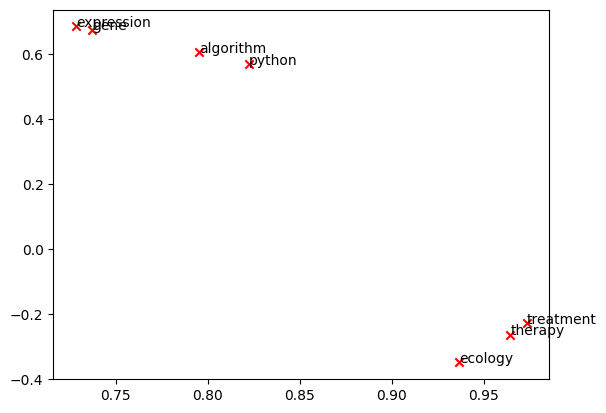

In [ ]:
import pickle


with open("cooccurrence_matrix.pickle", "rb") as f:
    M = pickle.load(f)
with open("word2ind.pickle", "rb") as f:
    word2ind = pickle.load(f)

M_reduced = TruncatedSVD(n_components=2).fit_transform(M)
embeddings = normalize(M_reduced)

for word in [
    "algorithm",
    "ecology",
    "expression",
    "gene",
    "python",
    "treatment",
    "therapy",
]:
    word_index = word2ind[word]
    word_embedding = embeddings[word_index]
    x, y = word_embedding[0], word_embedding[1]
    plt.scatter(x, y, marker="x", color="red")
    plt.text(x, y, word, fontsize=10)

In [ ]:
M_reduced

array([[3.2817442e+00, 1.5970670e+00],
       [1.3465562e-02, 1.3823121e-02],
       [2.5340094e-05, 1.0007083e-06],
       ...,
       [7.3344737e-26, 4.1064971e-27],
       [2.0710418e-08, 4.8039539e-08],
       [3.2057111e-22, 1.8026261e-23]], dtype=float32)

In [ ]:
embeddings

array([[8.9917636e-01, 4.3758586e-01],
       [6.9774562e-01, 7.1627325e-01],
       [9.6131414e-01, 3.7963357e-02],
       ...,
       [7.3344735e-20, 4.1064970e-21],
       [1.9680841e-02, 4.5651350e-02],
       [3.2057111e-16, 1.8026261e-17]], dtype=float32)

In [ ]:
len(word2ind)  # vocabulary size

82127

Для эмпирической оценки допишите функцию `most_similar`.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


def most_similar(word, embeddings, word2ind, top_n=5):
    """
    Находит наиболее похожие на данное слово слова на основе косинусного сходства их векторных представлений.

    Параметры:
        word (str): Слово, для которого нужно найти похожие слова.
        embeddings (numpy.ndarray): Векторные представления слов.
        word2ind (dict): Словарь, сопоставляющий слова их индексам в матрице векторных представлений.
        top_n (int): Количество наиболее похожих слов для возврата.

    Возвращает:
        list: Список кортежей, содержащих наиболее похожие слова и их оценки косинусного сходства.
    """
    idx = word2ind[word]
    vector = embeddings[idx].reshape(1, -1)

    similarities = cosine_similarity(vector, embeddings)[0]
    top_similar_indices = similarities.argsort()[::-1][1 : top_n + 1]

    ind2word = {i: w for w, i in word2ind.items()}

    result = [(ind2word[i], similarities[i]) for i in top_similar_indices]
    return result

In [ ]:
M_reduced = TruncatedSVD(n_components=312).fit_transform(M)
embeddings = normalize(M_reduced)

for word in ["algorithm", "ecology", "expression", "gene", "python", "treatment"]:
    print("-" * 50)
    print(word, end="\n\n")
    print(most_similar(word, embeddings, word2ind, top_n=10))

--------------------------------------------------
algorithm

[('method', 0.79887474), ('approach', 0.7807463), ('technique', 0.7487472), ('procedure', 0.7150613), ('scheme', 0.7042259), ('heuristic', 0.68899924), ('formulation', 0.6595887), ('unsupervised', 0.6219591), ('idea', 0.617024), ('model', 0.612997)]
--------------------------------------------------
ecology

[('industrial', 0.5767247), ('diversity', 0.5640475), ('environment', 0.56268907), ('behaviour', 0.5532118), ('resource', 0.5304246), ('transformation', 0.5261247), ('evolution', 0.5238804), ('law', 0.52256817), ('ecological', 0.50932443), ('theory', 0.50721765)]
--------------------------------------------------
expression

[('proteincode', 0.967389), ('atrophydetermining', 0.9647424), ('runtdomain', 0.96465707), ('cytokineinducible', 0.9644345), ('oligoadenylate', 0.9643216), ('endotoxinresponsive', 0.9642592), ('intronless', 0.96423864), ('ssdb', 0.9641426), ('bclrelate', 0.96412563), ('yeastsaccharomyce', 0.96411055)

Теперь взглянем на реализацию "из коробки".

In [ ]:
def load_embedding_model():
    """Load GloVe Vectors
    Return:
        wv_from_bin: All 400000 embeddings, each lengh 200
    """
    import gensim.downloader as api

    wv_from_bin = api.load(
        "glove-wiki-gigaword-200"
    )  # есть и другие модели, см. gensim.downloader.info()['models'].keys()
    print("Loaded vocab size %i" % len(list(wv_from_bin.index_to_key)))
    return wv_from_bin


wv_from_bin = load_embedding_model()

[==================================================] 100.0% 252.1/252.1MB downloaded
Loaded vocab size 400000


In [ ]:
for word in ["algorithm", "ecology", "expression", "gene", "python", "treatment"]:
    print("-" * 50)
    print(word, end="\n\n")
    print(wv_from_bin.most_similar(word, 10))

--------------------------------------------------
algorithm

[('divide-and-conquer', 0.5534529089927673), ('krabat', 0.551224946975708), ('computes', 0.5506508946418762), ('jenalia.moreno@chron.com', 0.5458713173866272), ('fosterella', 0.5429463982582092), ('betterman', 0.540695071220398), ('starksia', 0.5393033623695374), ('algorithms', 0.5360755920410156), ('inugami', 0.5351618528366089), ('racinaea', 0.5292670130729675)]
--------------------------------------------------
ecology

[('icipe', 0.6646283864974976), ('zoogeography', 0.5999441742897034), ('ecofeminism', 0.5731804370880127), ('eco-systems', 0.546957790851593), ('energetics', 0.5300233364105225), ('palaeobiology', 0.5262896418571472), ('metapopulation', 0.5255571007728577), ('biogeochemistry', 0.5227234959602356), ('ecocriticism', 0.5164446234703064), ('afrofuturism', 0.5065551996231079)]
--------------------------------------------------
expression

[('sulf1', 0.6170405745506287), ('h19', 0.6167712211608887), ('dlc1', 0.6

Далее задания из серии "поиграться". Во всех заданиях необходимо пояснить результаты (1-2 предложения).

1. Выберите какое-либо многозначное слово. Найдите его ближайших соседей.

2. Найдите тройку слов $(w_1,w_2,w_3)$ таких, что $w_1$ and $w_2$ синонимы, а $w_1$ и $w_3$ антонимы, но косинусное расстояние между первым и третьим меньше, чем между первым и вторым.

3. Есть ли в векторах предвзятость? Попробуйте привести пример.

In [ ]:
# Пример выполнения задания - в вашем ответе не используйте эти данные :)
from pprint import pprint

# 1
pprint(wv_from_bin.most_similar("light"))
print()

# 2
w1, w2, w3 = "black", "dark", "white"
w1_w2_dist = wv_from_bin.distance(w1, w2)
w1_w3_dist = wv_from_bin.distance(w1, w3)
print("Synonyms {}, {} have cosine distance: {}".format(w1, w2, w1_w2_dist))
print("Antonyms {}, {} have cosine distance: {}".format(w1, w3, w1_w3_dist))
print()

# 3
A, B, C = "king", "woman", "man"
pprint(
    wv_from_bin.most_similar(positive=[A, B], negative=[C])
)  # vector(king) + vector(woman) - vector(man)
print("------------------------------------------------------")
pprint(
    wv_from_bin.most_similar(positive=[A], negative=[B, C])
)  # vector(king) - vector(woman) - vector(man)

[('bright', 0.6242774724960327),
 ('dark', 0.6141002178192139),
 ('lights', 0.6013951897621155),
 ('lighter', 0.558175265789032),
 ('heavy', 0.5408364534378052),
 ('sunlight', 0.5362919569015503),
 ('blue', 0.5349379777908325),
 ('colored', 0.5282376408576965),
 ('sky', 0.5239452719688416),
 ('color', 0.513929009437561)]

Synonyms black, dark have cosine distance: 0.3460924029350281
Antonyms black, white have cosine distance: 0.20702677965164185

[('queen', 0.6978678107261658),
 ('princess', 0.6081745028495789),
 ('monarch', 0.5889754891395569),
 ('throne', 0.5775108933448792),
 ('prince', 0.5750998258590698),
 ('elizabeth', 0.5463595986366272),
 ('daughter', 0.5399126410484314),
 ('kingdom', 0.5318052768707275),
 ('mother', 0.5168544054031372),
 ('crown', 0.5164473056793213)]
------------------------------------------------------
[('rajeswar', 0.5044880509376526),
 ('andrianampoinimerina', 0.48539915680885315),
 ('jangsu', 0.4846459627151489),
 ('seongjong', 0.4818635880947113),
 ('si

1. Light - есть группы, которые отвечают за свет (bright, lights, sunlight), есть группа которя отвечает за цвет (blue, colored, color). Есть антоним - heavy.
2. black, dark дальше, чем black, white. Скорее из-за того, что black, white чаще произносят вместе.
3. vector(king) + vector(woman) - vector(man) - получили то, что ожидали - queen, princess
но vector(king) - vector(woman) - vector(man) - получается не абстракции, типа "власть" а zhaoxiang (имя короля)

Примените модель "из коробки" к вашим данным из OpenAlex так же, как в предыдущих заданиях. Оцените результаты. Вероятно, вам потребуется метод `get_mean_vector`.

Скорее всего, у вас не получится применить Наивный Байес. Почему?

In [ ]:
def get_mean_vector(words):
    vectors = [wv_from_bin[word] for word in words if word in wv_from_bin]
    if not vectors:
        return np.zeros(wv_from_bin.vector_size)
    return np.mean(vectors, axis=0)

In [ ]:
X_train_vec = np.stack(X_train.apply(lambda x: get_mean_vector(nltk.word_tokenize(x))))
X_test_vec = np.stack(X_test.apply(lambda x: get_mean_vector(nltk.word_tokenize(x))))

In [ ]:
clf = LinearSVC()
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)

print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

  Health Sciences       0.85      0.74      0.79       316
    Life Sciences       0.77      0.63      0.69       308
Physical Sciences       0.83      0.90      0.86       861
  Social Sciences       0.81      0.85      0.83       530

         accuracy                           0.82      2015
        macro avg       0.82      0.78      0.79      2015
     weighted avg       0.82      0.82      0.82      2015



In [ ]:
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)
print(classification_report(y_test, y_pred))

ValueError: Negative values in data passed to MultinomialNB (input X).

Мы не можем применить MultinomialNB так как он не работает с отрицательными числами, котоыре содержаться в векторах

## Самый главный вопрос (1 балл)

Возможно, вы уже задавались вопросом, откуда именно появились доменные метки в данных, с которыми вы работали. Если нет - самое время задуматься. Разметить вручную несколько миллионов статей - задача, близкая к невозможной.

Изучите документацию OpenAlex. Письменно ответьте на вопрос, каким образом записи получают метки, а также какое влияние это потенциально имеет на ваш пайплайн классификации. Есть ли связь с так называемым явлением feedback loop?

**Ответ:**

OpenAlex учитывает следующие признаки при определении топиков к работе: title, abstract, source (journal) name, and citations. Есть примерно 4500 классов топиков. Модель для каждого документа считает score для каждого топика - насколько работа соответсвует топику. Берется n главных топиков, топик с максимальным score становится primary_topic, откуда уже можно определить domain.

Перед классификацией title и abstract подаются в mBERT (как я понял для создания эмбеддингов), также еще учитываются цитирования (если title+abstract плохо справились может помочь статья, к которой данная работа ссылается) и журнал, в котором публикуется работа. Далее это подается в классификатор, как я понял, в нейросеть.
